In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")
import seaborn as sn
import numpy as np

In [2]:
df=pd.read_csv('census_income.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df.shape

(32560, 15)

In [4]:
df.isnull().values.any()

False

In [5]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [6]:
for i in df.columns:
    if 0<len(df[df[i]=='?']):
        print(i)
        print(len(df[df[i]=='?']))

In [7]:
for i in df.columns:
    if 0<len(df[df[i]==' ?']):
        print(i)
        print(len(df[df[i]==' ?']))

Workclass
1836
Occupation
1843
Native_country
583


In [8]:
for i in df.columns:
    if 0<len(df[df[i]=='']):
        print(i)
        print(len(df[df[i]=='']))

In [9]:
for i in df.columns:
    if 0<len(df[df[i]==' ']):
        print(i)
        print(len(df[df[i]==' ']))

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [11]:
listy=['Workclass','Education','Native_country','Marital_status','Relationship','Occupation','Race','Sex','Native_country']
for j in listy:
    for i in range(len(df[j])):
        df[j][i]=df[j][i].strip()

In [12]:
df['Workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: Workclass, dtype: int64

In [13]:
df[df['Workclass']=='?']['Occupation'].value_counts()

?    1836
Name: Occupation, dtype: int64

In [14]:
df[df['Workclass']=='?']['Education'].value_counts()

HS-grad         532
Some-college    514
Bachelors       173
11th            118
10th            100
7th-8th          72
Assoc-voc        61
9th              51
Masters          48
Assoc-acdm       47
12th             40
5th-6th          30
Prof-school      18
Doctorate        15
1st-4th          12
Preschool         5
Name: Education, dtype: int64

In [15]:
for i in set(df[df['Workclass']=='?']['Education']):
    print(i)
    print(df[df['Education']==i]['Workclass'].value_counts()[:1])
    print('*'*10)

HS-grad
Private    7780
Name: Workclass, dtype: int64
**********
5th-6th
Private    266
Name: Workclass, dtype: int64
**********
11th
Private    923
Name: Workclass, dtype: int64
**********
12th
Private    333
Name: Workclass, dtype: int64
**********
Prof-school
Private    257
Name: Workclass, dtype: int64
**********
1st-4th
Private    136
Name: Workclass, dtype: int64
**********
7th-8th
Private    424
Name: Workclass, dtype: int64
**********
Bachelors
Private    3551
Name: Workclass, dtype: int64
**********
9th
Private    387
Name: Workclass, dtype: int64
**********
Some-college
Private    5094
Name: Workclass, dtype: int64
**********
Assoc-acdm
Private    729
Name: Workclass, dtype: int64
**********
Assoc-voc
Private    1005
Name: Workclass, dtype: int64
**********
Doctorate
Private    181
Name: Workclass, dtype: int64
**********
10th
Private    695
Name: Workclass, dtype: int64
**********
Masters
Private    894
Name: Workclass, dtype: int64
**********
Preschool
Private    41
Name: W

In [18]:
df[df['Workclass']!='?']['Workclass'].mode()[0]

'Private'

In [19]:
fill=df[df['Workclass']!='?']['Workclass'].mode()[0]
for i in range(len(df['Workclass'])):
    if df['Workclass'][i]=='?':
        df['Workclass'][i]=fill

In [20]:
df['Occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3769
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: Occupation, dtype: int64

In [21]:
df[df['Occupation']=='?']['Workclass'].value_counts()

Private         1836
Never-worked       7
Name: Workclass, dtype: int64

In [22]:
df[df['Workclass']=='Never-worked']['Occupation'].value_counts()

?    7
Name: Occupation, dtype: int64

In [23]:
for i in range(len(df['Workclass'])):
    if df['Workclass'][i]=='Never-worked':
        df['Occupation'][i]='NO'

In [24]:
df[df['Occupation']=='?']['Workclass'].value_counts()

Private    1836
Name: Workclass, dtype: int64

In [25]:
dicty={}
for i in set(df[df['Occupation']=='?']['Education']):
    print(i)
    print('-'*3)
    print(df[df['Education']==i]['Occupation'].value_counts()[:1])
    print('*'*10)
    dicty[i]=str(df[df['Education']==i]['Occupation'].value_counts()[:1]).split()[0]

HS-grad
---
Craft-repair    1922
Name: Occupation, dtype: int64
**********
5th-6th
---
Other-service    64
Name: Occupation, dtype: int64
**********
11th
---
Other-service    238
Name: Occupation, dtype: int64
**********
12th
---
Other-service    85
Name: Occupation, dtype: int64
**********
Prof-school
---
Prof-specialty    452
Name: Occupation, dtype: int64
**********
1st-4th
---
Other-service    40
Name: Occupation, dtype: int64
**********
7th-8th
---
Craft-repair    116
Name: Occupation, dtype: int64
**********
Bachelors
---
Prof-specialty    1495
Name: Occupation, dtype: int64
**********
9th
---
Other-service    101
Name: Occupation, dtype: int64
**********
Some-college
---
Adm-clerical    1281
Name: Occupation, dtype: int64
**********
Assoc-acdm
---
Adm-clerical    193
Name: Occupation, dtype: int64
**********
Assoc-voc
---
Craft-repair    252
Name: Occupation, dtype: int64
**********
Doctorate
---
Prof-specialty    321
Name: Occupation, dtype: int64
**********
10th
---
Other-serv

In [26]:
for i in range(len(df['Occupation'])):
    if df['Occupation'][i]=='?':
        df['Occupation'][i]=dicty[df['Education'][i]]

In [27]:
df[df['Occupation']=='?'].value_counts()

Series([], dtype: int64)

In [28]:
df['Native_country'].value_counts()

United-States                 29169
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                      

In [29]:
df[df['Native_country']=='?']['Education'].value_counts()

Bachelors       145
HS-grad         133
Some-college    104
Masters          49
Doctorate        23
7th-8th          19
Prof-school      17
12th             16
Assoc-voc        16
5th-6th          15
Assoc-acdm       12
10th             12
9th               8
11th              8
1st-4th           5
Preschool         1
Name: Education, dtype: int64

In [30]:
dicty={}
for i in set(df[df['Native_country']=='?']['Education']):
    print(i)
    print('-'*3)
    print(df[df['Education']==i]['Native_country'].value_counts()[:1])
    print('*'*10)
    dicty[i]=str(df[df['Education']==i]['Native_country'].value_counts()[:1]).split()[0]

HS-grad
---
United-States    9702
Name: Native_country, dtype: int64
**********
5th-6th
---
Mexico    148
Name: Native_country, dtype: int64
**********
11th
---
United-States    1067
Name: Native_country, dtype: int64
**********
Prof-school
---
United-States    502
Name: Native_country, dtype: int64
**********
12th
---
United-States    365
Name: Native_country, dtype: int64
**********
7th-8th
---
United-States    499
Name: Native_country, dtype: int64
**********
1st-4th
---
Mexico    64
Name: Native_country, dtype: int64
**********
Bachelors
---
United-States    4765
Name: Native_country, dtype: int64
**********
9th
---
United-States    395
Name: Native_country, dtype: int64
**********
Some-college
---
United-States    6740
Name: Native_country, dtype: int64
**********
Assoc-acdm
---
United-States    982
Name: Native_country, dtype: int64
**********
Assoc-voc
---
United-States    1289
Name: Native_country, dtype: int64
**********
Doctorate
---
United-States    328
Name: Native_country,

In [31]:
for i in range(len(df['Native_country'])):
    if df['Native_country'][i]=='?':
        df['Native_country'][i]=dicty[df['Education'][i]]

In [32]:
for i in df.columns:
    if 0<len(df[df[i]=='?']):
        print(i)
        print(len(df[df[i]=='?']))

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [34]:
dicty={}
for i in df[['Workclass']]:
    dicto={}
    for j in range(len(df[i].unique())):
        dicto[df[i].unique()[j]]=j
    dicty[i]=dicto
dicty

{'Workclass': {'Self-emp-not-inc': 0,
  'Private': 1,
  'State-gov': 2,
  'Federal-gov': 3,
  'Local-gov': 4,
  'Self-emp-inc': 5,
  'Without-pay': 6,
  'Never-worked': 7}}

In [35]:
for i in ['Workclass']:
    df[i]=df[i].apply(lambda x:dicty[i][x])

In [36]:
dicty={}
for i in df[['Education']]:
    dicto={}
    for j in range(len(df[i].unique())):
        dicto[df[i].unique()[j]]=j
    dicty[i]=dicto
dicty

{'Education': {'Bachelors': 0,
  'HS-grad': 1,
  '11th': 2,
  'Masters': 3,
  '9th': 4,
  'Some-college': 5,
  'Assoc-acdm': 6,
  'Assoc-voc': 7,
  '7th-8th': 8,
  'Doctorate': 9,
  'Prof-school': 10,
  '5th-6th': 11,
  '10th': 12,
  '1st-4th': 13,
  'Preschool': 14,
  '12th': 15}}

In [37]:
for i in ['Education']:
    df[i]=df[i].apply(lambda x:dicty[i][x])

In [38]:
dicty={}
for i in df[['Marital_status']]:
    dicto={}
    for j in range(len(df[i].unique())):
        dicto[df[i].unique()[j]]=j
    dicty[i]=dicto
dicty

{'Marital_status': {'Married-civ-spouse': 0,
  'Divorced': 1,
  'Married-spouse-absent': 2,
  'Never-married': 3,
  'Separated': 4,
  'Married-AF-spouse': 5,
  'Widowed': 6}}

In [39]:
dicty['Marital_status']['Married-spouse-absent']=dicty['Marital_status']['Married-civ-spouse']
dicty['Marital_status']['Married-AF-spouse']=dicty['Marital_status']['Married-civ-spouse']
dicty['Marital_status']['Separated']=dicty['Marital_status']['Divorced']
dicty['Marital_status']['Widowed']=2
dicty

{'Marital_status': {'Married-civ-spouse': 0,
  'Divorced': 1,
  'Married-spouse-absent': 0,
  'Never-married': 3,
  'Separated': 1,
  'Married-AF-spouse': 0,
  'Widowed': 2}}

In [40]:
for i in ['Marital_status']:
    df[i]=df[i].apply(lambda x:dicty[i][x])

In [41]:
dicty={}
for i in df[['Occupation']]:
    dicto={}
    for j in range(len(df[i].unique())):
        dicto[df[i].unique()[j]]=j
    dicty[i]=dicto
dicty

{'Occupation': {'Exec-managerial': 0,
  'Handlers-cleaners': 1,
  'Prof-specialty': 2,
  'Other-service': 3,
  'Adm-clerical': 4,
  'Sales': 5,
  'Craft-repair': 6,
  'Transport-moving': 7,
  'Farming-fishing': 8,
  'Machine-op-inspct': 9,
  'Tech-support': 10,
  'Protective-serv': 11,
  'Armed-Forces': 12,
  'Priv-house-serv': 13,
  'NO': 14}}

In [42]:
for i in ['Occupation']:
    df[i]=df[i].apply(lambda x:dicty[i][x])

In [43]:
dicty={}
for i in df[['Relationship']]:
    dicto={}
    for j in range(len(df[i].unique())):
        dicto[df[i].unique()[j]]=j
    dicty[i]=dicto
dicty

{'Relationship': {'Husband': 0,
  'Not-in-family': 1,
  'Wife': 2,
  'Own-child': 3,
  'Unmarried': 4,
  'Other-relative': 5}}

In [44]:
for i in ['Relationship']:
    df[i]=df[i].apply(lambda x:dicty[i][x])

In [45]:
dicty={}
for i in df[['Race']]:
    dicto={}
    for j in range(len(df[i].unique())):
        dicto[df[i].unique()[j]]=j
    dicty[i]=dicto
dicty

{'Race': {'White': 0,
  'Black': 1,
  'Asian-Pac-Islander': 2,
  'Amer-Indian-Eskimo': 3,
  'Other': 4}}

In [46]:
for i in ['Race']:
    df[i]=df[i].apply(lambda x:dicty[i][x])

In [47]:
dicty={}
for i in df[['Sex']]:
    dicto={}
    for j in range(len(df[i].unique())):
        dicto[df[i].unique()[j]]=j
    dicty[i]=dicto
dicty

{'Sex': {'Male': 0, 'Female': 1}}

In [48]:
for i in ['Sex']:
    df[i]=df[i].apply(lambda x:dicty[i][x])

In [49]:
dicty={}
for i in df[['Native_country']]:
    dicto={}
    for j in range(len(df[i].unique())):
        dicto[df[i].unique()[j]]=j
    dicty[i]=dicto
dicty

{'Native_country': {'United-States': 0,
  'Cuba': 1,
  'Jamaica': 2,
  'India': 3,
  'Mexico': 4,
  'South': 5,
  'Puerto-Rico': 6,
  'Honduras': 7,
  'England': 8,
  'Canada': 9,
  'Germany': 10,
  'Iran': 11,
  'Philippines': 12,
  'Italy': 13,
  'Poland': 14,
  'Columbia': 15,
  'Cambodia': 16,
  'Thailand': 17,
  'Ecuador': 18,
  'Laos': 19,
  'Taiwan': 20,
  'Haiti': 21,
  'Portugal': 22,
  'Dominican-Republic': 23,
  'El-Salvador': 24,
  'France': 25,
  'Guatemala': 26,
  'China': 27,
  'Japan': 28,
  'Yugoslavia': 29,
  'Peru': 30,
  'Outlying-US(Guam-USVI-etc)': 31,
  'Scotland': 32,
  'Trinadad&Tobago': 33,
  'Greece': 34,
  'Nicaragua': 35,
  'Vietnam': 36,
  'Hong': 37,
  'Ireland': 38,
  'Hungary': 39,
  'Holand-Netherlands': 40}}

In [50]:
for i in ['Native_country']:
    df[i]=df[i].apply(lambda x:dicty[i][x])

In [51]:
dicty={}
for i in df[['Income']]:
    dicto={}
    for j in range(len(df[i].unique())):
        dicto[df[i].unique()[j]]=j
    dicty[i]=dicto
dicty

{'Income': {' <=50K': 0, ' >50K': 1}}

In [52]:
for i in ['Income']:
    df[i]=df[i].apply(lambda x:dicty[i][x])

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             32560 non-null  int64
 1   Workclass       32560 non-null  int64
 2   Fnlwgt          32560 non-null  int64
 3   Education       32560 non-null  int64
 4   Education_num   32560 non-null  int64
 5   Marital_status  32560 non-null  int64
 6   Occupation      32560 non-null  int64
 7   Relationship    32560 non-null  int64
 8   Race            32560 non-null  int64
 9   Sex             32560 non-null  int64
 10  Capital_gain    32560 non-null  int64
 11  Capital_loss    32560 non-null  int64
 12  Hours_per_week  32560 non-null  int64
 13  Native_country  32560 non-null  int64
 14  Income          32560 non-null  int64
dtypes: int64(15)
memory usage: 3.7 MB


In [54]:
df.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.354146,1.897818e+05,3.424570,10.080590,1.213145,4.329730,1.392291,0.221714,0.330805,1077.615172,87.306511,40.437469,1.143550,0.240817
std,13.640642,1.120649,1.055498e+05,3.453582,2.572709,1.330752,2.914994,1.535159,0.627357,0.470510,7385.402999,402.966116,12.347618,4.817895,0.427586
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,1.000000,1.178315e+05,1.000000,9.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000,0.000000
50%,37.000000,1.000000,1.783630e+05,2.000000,10.000000,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000,0.000000
75%,48.000000,1.000000,2.370545e+05,5.000000,12.000000,3.000000,6.000000,3.000000,0.000000,1.000000,0.000000,0.000000,45.000000,0.000000,0.000000
max,90.000000,7.000000,1.484705e+06,15.000000,16.000000,3.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,40.000000,1.000000


In [56]:
df['Income'].value_counts()

0    24719
1     7841
Name: Income, dtype: int64

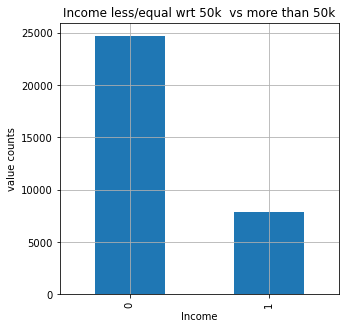

In [57]:
plt.figure(figsize=[5,5])
df['Income'].value_counts().plot(kind='bar')
plt.xlabel("Income")
plt.ylabel('value counts')
plt.title('Income less/equal wrt 50k  vs more than 50k')
plt.grid()

In [60]:
from sklearn.utils import resample
dfmin=df[df['Income']==1]
dfmax=df[df['Income']==0]
dfminup=resample(dfmin,replace=True,n_samples=24719,random_state=123)
dff=pd.concat([dfmax, dfminup])
print('Number of salary less than equal to 50k are:',dff['Income'].value_counts()[0])
print('Number of salary more than 50k are:',dff['Income'].value_counts()[1])
print('Unbalanced dataset' if dff['Income'].value_counts()[0]!=dff['Income'].value_counts()[1] else 'Balanced dataset')

Number of salary less than equal to 50k are: 24719
Number of salary more than 50k are: 24719
Balanced dataset


In [61]:
dff.corr()['Income']

Age               0.289057
Workclass         0.126142
Fnlwgt           -0.008812
Education        -0.057241
Education_num     0.386683
Marital_status   -0.495214
Occupation       -0.163636
Relationship     -0.431369
Race             -0.084025
Sex              -0.269534
Capital_gain      0.183494
Capital_loss      0.154448
Hours_per_week    0.272950
Native_country   -0.032149
Income            1.000000
Name: Income, dtype: float64

In [62]:
dff=dff.drop(['Fnlwgt'],axis=1)

<AxesSubplot:>

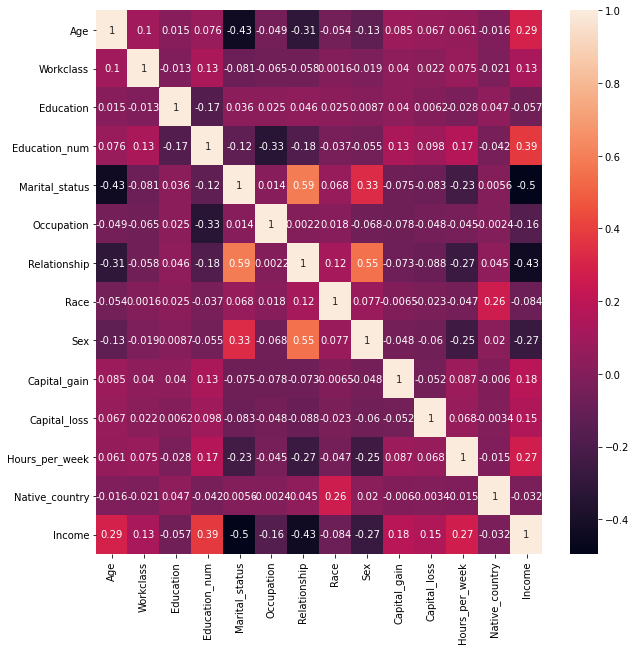

In [63]:
plt.figure(figsize=[10,10])
sn.heatmap(dff.corr(),annot=True)

In [64]:
dff=dff.drop(['Race'],axis=1)

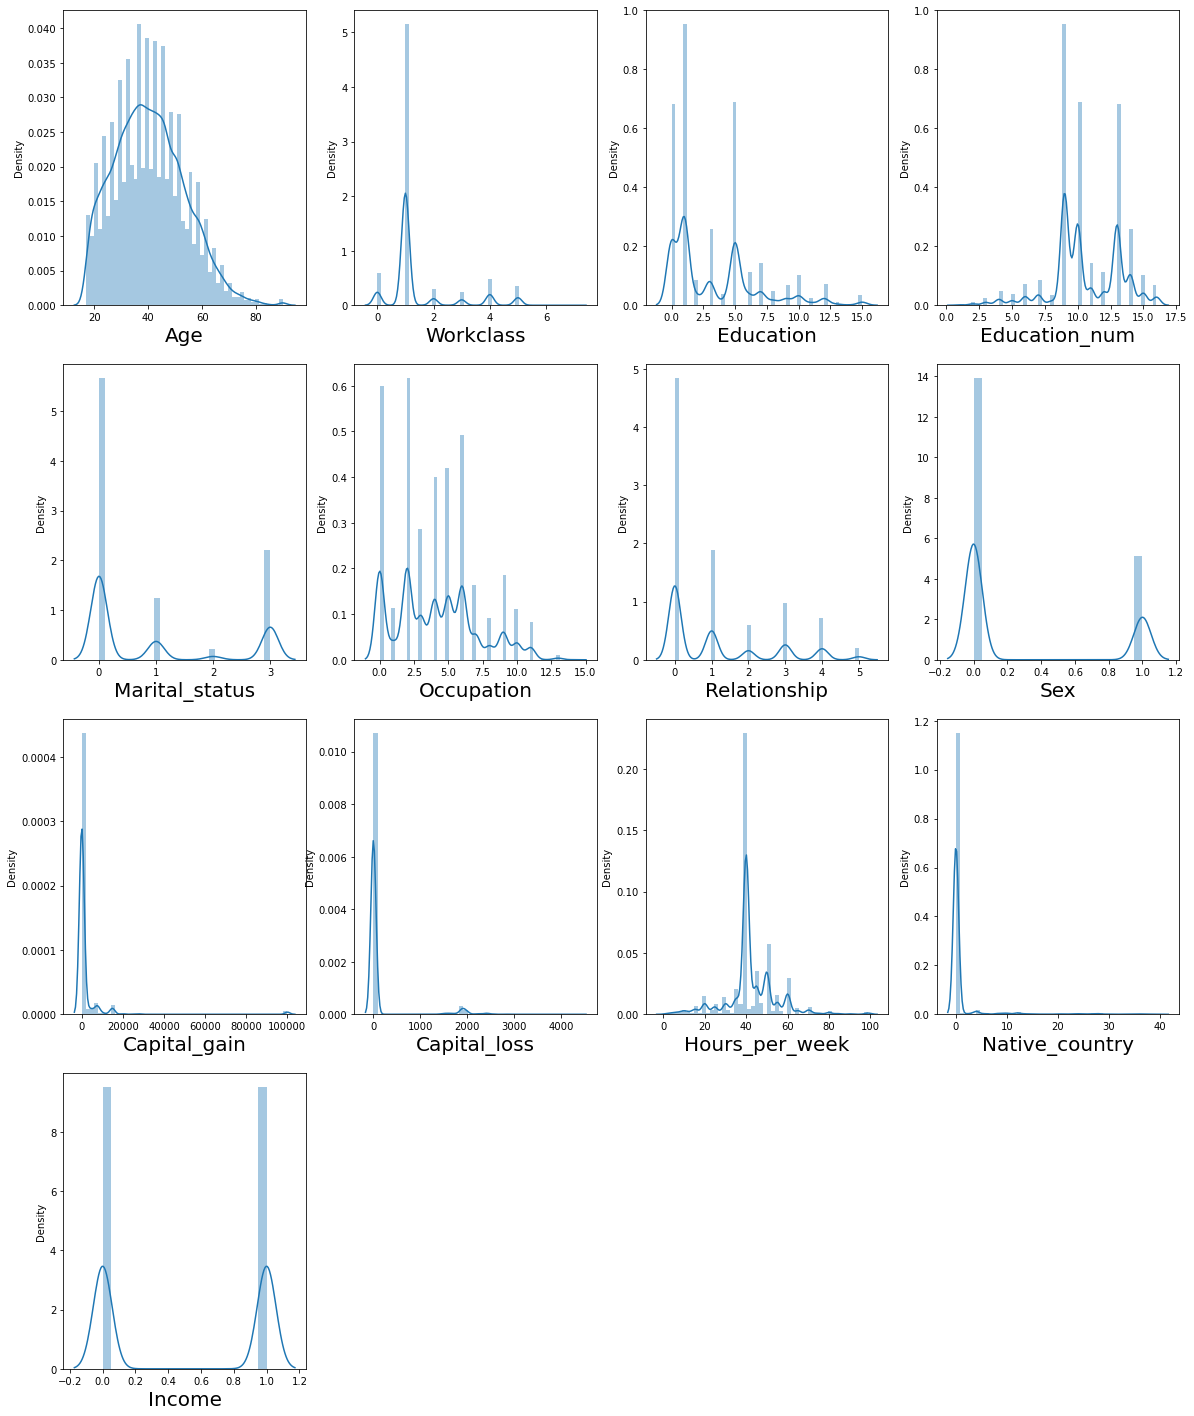

In [65]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in dff.columns:
    if plotnumber<=len(dff.columns):
        ax=plt.subplot(4,4,plotnumber)
        sn.distplot(dff[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

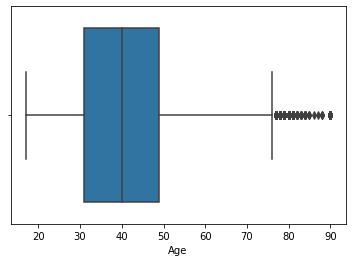

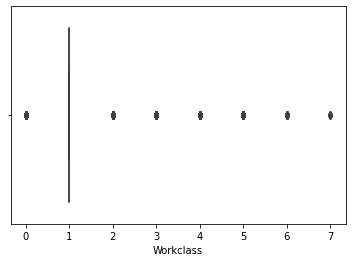

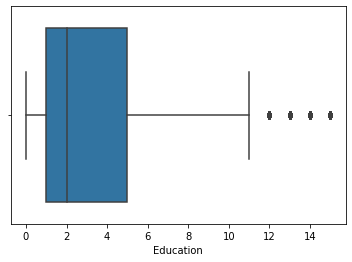

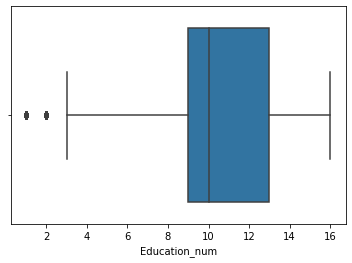

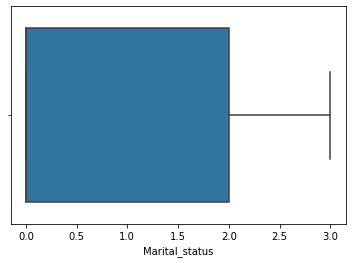

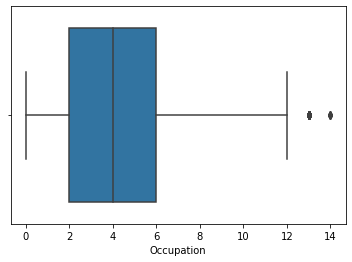

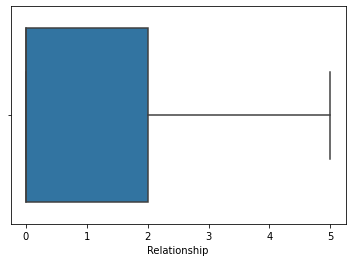

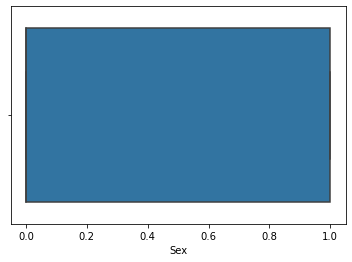

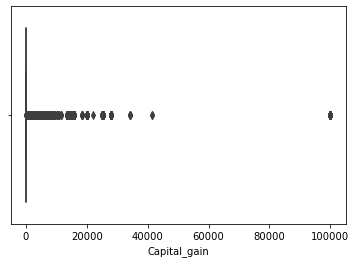

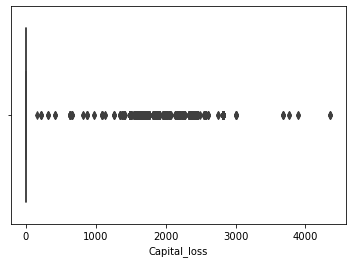

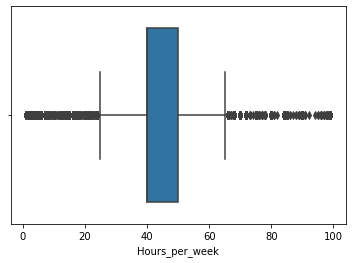

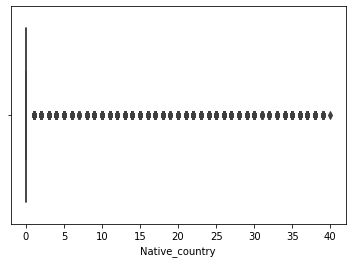

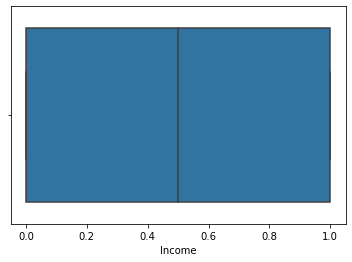

In [66]:
for i in dff.columns:
    sn.boxplot(dff[i])
    plt.show()

In [68]:
from scipy.stats import zscore
z_scr=zscore(dff)
print(dff.shape)
df_new=dff.loc[(abs(z_scr)<3).all(axis=1)]
print(df_new.shape)

(49438, 13)
(43298, 13)


In [69]:
y = dff[['Income']]
x = dff.drop(columns = ['Income'])

In [70]:
print(x.skew())

Age               0.390765
Workclass         1.803347
Education         1.155032
Education_num    -0.317976
Marital_status    0.932268
Occupation        0.457972
Relationship      1.166000
Sex               1.044303
Capital_gain      8.385728
Capital_loss      3.652833
Hours_per_week    0.285011
Native_country    5.280811
dtype: float64


In [72]:
print(len(x.skew().loc[x.skew()>0.5]))

8


In [73]:
for index in x.skew().index:
    if x.skew().loc[index] >0.55:
        x[index]=np.cbrt(x[index])

In [74]:
print(x.skew())

Age               0.390765
Workclass        -1.052537
Education        -0.470810
Education_num    -0.317976
Marital_status    0.550254
Occupation        0.457972
Relationship      0.311038
Sex               1.044303
Capital_gain      3.040787
Capital_loss      3.497646
Hours_per_week    0.285011
Native_country    3.531226
dtype: float64


In [76]:
from sklearn.feature_selection import SelectKBest,chi2
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))

             Specs         Score
8     Capital_gain  85651.935144
0              Age  17059.627679
10  Hours_per_week  13030.143270
9     Capital_loss  12934.504718
4   Marital_status  11078.734222
6     Relationship   7859.760973
3    Education_num   4746.905944
5       Occupation   2929.988188
7              Sex   2626.964603
2        Education    336.994503


In [77]:
newdf=x[['Capital_gain','Age','Hours_per_week','Capital_loss','Marital_status','Relationship','Education_num',
         'Occupation','Sex','Education']]
newdf['Income']=y
newdf

,Capital_gain,Age,Hours_per_week,Capital_loss,Marital_status,Relationship,Education_num,Occupation,Sex,Education,Income
0,0.000000,50,13,0.0,0.00000,0.000000,13,0,0.0,0.000000,0
1,0.000000,38,40,0.0,1.00000,1.000000,9,1,0.0,1.000000,0
2,0.000000,53,40,0.0,0.00000,0.000000,7,1,0.0,1.259921,0
3,0.000000,28,40,0.0,0.00000,1.259921,13,2,1.0,0.000000,0
4,0.000000,37,40,0.0,0.00000,1.259921,14,0,1.0,1.442250,0
...,...,...,...,...,...,...,...,...,...,...,...
3699,0.000000,53,60,0.0,0.00000,0.000000,10,0,0.0,1.709976,1
18063,0.000000,31,50,0.0,0.00000,1.259921,13,0,1.0,0.000000,1
28086,24.675267,41,40,0.0,0.00000,0.000000,15,0,0.0,2.154435,1
6034,46.415734,78,20,0.0,1.44225,1.000000,13,0,0.0,0.000000,1


In [78]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
newdf[['Capital_gain','Capital_loss']] = scaler.fit_transform(newdf[['Capital_gain','Capital_loss']])
newdf.reset_index(inplace=True)
newdf

,index,Capital_gain,Age,Hours_per_week,Capital_loss,Marital_status,Relationship,Education_num,Occupation,Sex,Education,Income
0,0,-0.356646,50,13,-0.266622,0.00000,0.000000,13,0,0.0,0.000000,0
1,1,-0.356646,38,40,-0.266622,1.00000,1.000000,9,1,0.0,1.000000,0
2,2,-0.356646,53,40,-0.266622,0.00000,0.000000,7,1,0.0,1.259921,0
3,3,-0.356646,28,40,-0.266622,0.00000,1.259921,13,2,1.0,0.000000,0
4,4,-0.356646,37,40,-0.266622,0.00000,1.259921,14,0,1.0,1.442250,0
...,...,...,...,...,...,...,...,...,...,...,...,...
49433,3699,-0.356646,53,60,-0.266622,0.00000,0.000000,10,0,0.0,1.709976,1
49434,18063,-0.356646,31,50,-0.266622,0.00000,1.259921,13,0,1.0,0.000000,1
49435,28086,2.759440,41,40,-0.266622,0.00000,0.000000,15,0,0.0,2.154435,1
49436,6034,5.504907,78,20,-0.266622,1.44225,1.000000,13,0,0.0,0.000000,1


In [81]:
import random
n=49438
s=14829
skip = sorted(random.sample(range(1, n), n-s))  # n+1 to compensate for header
sampledf=newdf.copy()
sampledf.drop(skip,axis=0,inplace=True)
sampledf

,index,Capital_gain,Age,Hours_per_week,Capital_loss,Marital_status,Relationship,Education_num,Occupation,Sex,Education,Income
0,0,-0.356646,50,13,-0.266622,0.00000,0.000000,13,0,0.0,0.000000,0
10,16,-0.356646,32,40,-0.266622,1.44225,1.587401,9,9,0.0,1.000000,0
12,20,-0.356646,54,20,-0.266622,1.00000,1.587401,9,3,1.0,1.000000,0
15,23,-0.356646,59,40,-0.266622,1.00000,1.587401,9,10,1.0,1.000000,0
27,38,-0.356646,48,40,-0.266622,0.00000,0.000000,12,2,0.0,1.817121,0
...,...,...,...,...,...,...,...,...,...,...,...,...
49423,25056,-0.356646,29,56,3.478041,1.44225,1.000000,11,11,0.0,1.912931,1
49430,13839,-0.356646,34,50,3.730407,0.00000,0.000000,12,5,0.0,1.817121,1
49432,6940,-0.356646,46,40,-0.266622,0.00000,0.000000,14,0,0.0,1.442250,1
49434,18063,-0.356646,31,50,-0.266622,0.00000,1.259921,13,0,1.0,0.000000,1


In [82]:
y = sampledf[['Income']]
x = sampledf.drop(columns = ['Income'])

In [83]:
def besttrain(model,x,y):
    random=0
    score=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state = i,test_size=0.20,stratify=y)
        model.fit(x_train,y_train)
        tmp=roc_auc_score(y_test,model.predict(x_test))
        #print(i,tmp)
        if tmp>score:
            score=tmp
            random=i
    print("maximum roc_auc_score is at random state :",random," and it is :",score)

In [84]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LassoLars
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import SGDClassifier
from sklearn.impute import KNNImputer
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.semi_supervised import LabelSpreading,LabelPropagation
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis,LinearDiscriminantAnalysis
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC,NuSVC
from sklearn.linear_model import RidgeClassifierCV,PassiveAggressiveClassifier,Perceptron
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.neighbors import NearestCentroid
from sklearn.dummy import DummyClassifier

models=[LogisticRegression(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),SVC(),RidgeClassifier(),
        BaggingClassifier(),GradientBoostingClassifier(),SGDClassifier(),
       LGBMClassifier(),XGBClassifier(),ExtraTreesClassifier(),AdaBoostClassifier(),
       QuadraticDiscriminantAnalysis(),CalibratedClassifierCV(),LinearSVC(),NuSVC(),
       LinearDiscriminantAnalysis(),RidgeClassifierCV(),GaussianNB(),BernoulliNB(),
        PassiveAggressiveClassifier(),Perceptron(),DummyClassifier()]

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score,roc_curve
for i in models:
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state = 42,test_size=0.20,stratify=y)
    scores=cross_val_score(i,x_train,y_train,cv=5,scoring='roc_auc')
    score=np.mean(scores)
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    if roc_auc_score(y_test,y_pred)>score:
        diff=roc_auc_score(y_test,y_pred)-score
        print('roc bigger')
    else:
        diff=score-roc_auc_score(y_test,y_pred)
    print('*'*10)
    print(i)
    print('score',score)
    print('roc',roc_auc_score(y_test,y_pred))
    print('diff',diff)

**********
LogisticRegression()
score 0.8659755380987774
roc 0.7809529655699241
diff 0.08502257252885326
roc bigger
**********
DecisionTreeClassifier()
score 0.8210319302003164
roc 0.8369632236590823
diff 0.01593129345876587
**********
KNeighborsClassifier()
score 0.6516359331409973
roc 0.6308110983794402
diff 0.020824834761557165
**********
RandomForestClassifier()
score 0.9385185768297852
roc 0.8642621996689765
diff 0.07425637716080868
**********
SVC()
score 0.5056679124545455
roc 0.495912678925447
diff 0.009755233529098462
**********
RidgeClassifier()
score 0.8869175512744876
roc 0.8022816973136174
diff 0.08463585396087014
**********
BaggingClassifier()
score 0.9206269578974446
roc 0.8544128880886125
diff 0.06621406980883215
**********
GradientBoostingClassifier()
score 0.9227243302577619
roc 0.8352217129553845
diff 0.0875026173023774
roc bigger
**********
SGDClassifier()
score 0.5355348528331577
roc 0.5728092431931031
diff 0.0372743903599454
**********
LGBMClassifier()
score 0.9331

In [86]:
parameters={
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01,0.05,0.1],
    'booster': ['gbtree', 'gblinear'],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [0.5, 1, 5],
    'base_score': [0.2, 0.5, 1],
    'eval_metric':['auc','logloss','error']
}
clf = RandomizedSearchCV(XGBClassifier(), parameters, cv=10,scoring="roc_auc",n_jobs=-1,verbose=1)
clf.fit(x,y)
clf.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


{'reg_lambda': 5,
 'reg_alpha': 0,
 'n_estimators': 200,
 'learning_rate': 0.1,
 'eval_metric': 'logloss',
 'booster': 'gbtree',
 'base_score': 0.2}

In [87]:
parameters={'n_estimators':[int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
            'criterion':['gini', 'entropy'],'max_features':['auto', 'sqrt', 'log2'],
            'max_depth':[int(x) for x in np.linspace(10, 110, num = 11)]}
clf = RandomizedSearchCV(RandomForestClassifier(), parameters, cv=10,scoring="roc_auc",n_jobs=-1,verbose=1)
clf.fit(x,y)
clf.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


{'n_estimators': 1000,
 'max_features': 'log2',
 'max_depth': 60,
 'criterion': 'entropy'}

In [88]:
besttrain(XGBClassifier(reg_lambda=1,reg_alpha=0.5,n_estimators=100,learning_rate=0.05,eval_metric='error',
                        booster='gbtree',base_score=0.2),x,y)

maximum roc_auc_score is at random state : 60  and it is : 0.8548121169131154


In [89]:
besttrain(RandomForestClassifier(n_estimators=1400,max_depth=60,criterion='entropy',max_features='auto'),x,y)

maximum roc_auc_score is at random state : 81  and it is : 0.8804459722449574


In [90]:
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 64,test_size=0.20,stratify=y)
model=XGBClassifier(reg_lambda=1,reg_alpha=0.5,n_estimators=100,learning_rate=0.05,eval_metric='error',
                        booster='gbtree',base_score=0.2)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [93]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
print("Confusion matrix \n",confusion_matrix(y_test,y_pred))
print("f1 score is : ",f1_score(y_test,y_pred))
print("classification report \n",classification_report(y_test,y_pred))
print("AUC ROC Score: ",roc_auc_score(y_test,y_pred))
scores=cross_val_score(model,x,y,cv=5,scoring='roc_auc')
score=np.mean(scores)
std=np.std(scores)
print('CV mean',score)
print('std:',std)

Confusion matrix 
 [[1197  293]
 [ 160 1316]]
f1 score is :  0.8531604538087519
classification report 
               precision    recall  f1-score   support

           0       0.88      0.80      0.84      1490
           1       0.82      0.89      0.85      1476

    accuracy                           0.85      2966
   macro avg       0.85      0.85      0.85      2966
weighted avg       0.85      0.85      0.85      2966

AUC ROC Score:  0.8474773103435731
CV mean 0.5439626735820051
std: 0.2536703517877707


In [94]:
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 64,test_size=0.20,stratify=y)
rfmodel=RandomForestClassifier(n_estimators=1400,max_depth=60,criterion='entropy',max_features='auto')
rfmodel.fit(x_train,y_train)
y_pred=rfmodel.predict(x_test)
print("Confusion matrix \n",confusion_matrix(y_test,y_pred))
print("f1 score is : ",f1_score(y_test,y_pred))
print("classification report \n",classification_report(y_test,y_pred))
print("AUC ROC Score: ",roc_auc_score(y_test,y_pred))
scores=cross_val_score(rfmodel,x,y,cv=5,scoring='roc_auc')
score=np.mean(scores)
std=np.std(scores)
print('CV mean',score)
print('std:',std)

Confusion matrix 
 [[1237  253]
 [ 143 1333]]
f1 score is :  0.8706727629000653
classification report 
               precision    recall  f1-score   support

           0       0.90      0.83      0.86      1490
           1       0.84      0.90      0.87      1476

    accuracy                           0.87      2966
   macro avg       0.87      0.87      0.87      2966
weighted avg       0.87      0.87      0.87      2966

AUC ROC Score:  0.8666589367235954
CV mean 0.7348247178227233
std: 0.13974719960992846


In [95]:
y = newdf[['Income']]
x = newdf.drop(columns = ['Income'])
y_pred=model.predict(x)
print("Confusion matrix \n",confusion_matrix(y,y_pred))
print("f1 score is : ",f1_score(y,y_pred))
print("classification report \n",classification_report(y,y_pred))
print("AUC ROC Score: ",roc_auc_score(y,y_pred))
scores=cross_val_score(model,x,y,cv=5,scoring='roc_auc')
score=np.mean(scores)
std=np.std(scores)
print('CV mean',score)
print('std:',std)

Confusion matrix 
 [[19924  4795]
 [ 2855 21864]]
f1 score is :  0.8511035851921056
classification report 
               precision    recall  f1-score   support

           0       0.87      0.81      0.84     24719
           1       0.82      0.88      0.85     24719

    accuracy                           0.85     49438
   macro avg       0.85      0.85      0.85     49438
weighted avg       0.85      0.85      0.85     49438

AUC ROC Score:  0.8452607306120798
CV mean 0.5244362419475092
std: 0.2702068483206842


In [96]:
y = newdf[['Income']]
x = newdf.drop(columns = ['Income'])
y_pred=rfmodel.predict(x)
print("Confusion matrix \n",confusion_matrix(y,y_pred))
print("f1 score is : ",f1_score(y,y_pred))
print("classification report \n",classification_report(y,y_pred))
print("AUC ROC Score: ",roc_auc_score(y,y_pred))
scores=cross_val_score(rfmodel,x,y,cv=5,scoring='roc_auc')
score=np.mean(scores)
std=np.std(scores)
print('CV mean',score)
print('std:',std)

Confusion matrix 
 [[21471  3248]
 [ 1742 22977]]
f1 score is :  0.9020493090452261
classification report 
               precision    recall  f1-score   support

           0       0.92      0.87      0.90     24719
           1       0.88      0.93      0.90     24719

    accuracy                           0.90     49438
   macro avg       0.90      0.90      0.90     49438
weighted avg       0.90      0.90      0.90     49438

AUC ROC Score:  0.8990654961770298
CV mean 0.8343769991132234
std: 0.10542012086473362


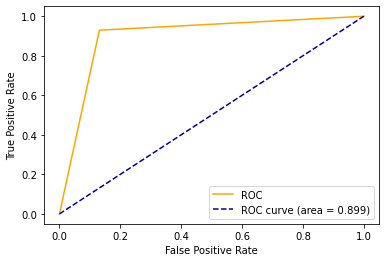

In [97]:
fpr, tpr, threshold = roc_curve(y,y_pred)
auc = roc_auc_score(y,y_pred)
plt.plot(fpr, tpr, color ='orange', label ='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label ='ROC curve (area = %0.3f)'% auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [98]:
x = newdf.drop(columns = ['Income'])
y_pred=rfmodel.predict(x)
newdf['Income_pred']=y_pred
newdf[['Income','Income_pred']]

,Income,Income_pred
0,0,0
1,0,0
2,0,0
3,0,1
4,0,1
...,...,...
49433,1,1
49434,1,1
49435,1,1
49436,1,1


In [99]:
newdf.Income.value_counts(),newdf.Income_pred.value_counts()

(0    24719
 1    24719
 Name: Income, dtype: int64,
 1    26225
 0    23213
 Name: Income_pred, dtype: int64)

Text(0.5, 1.0, 'Income less/equal wrt 50k  vs more than 50k')

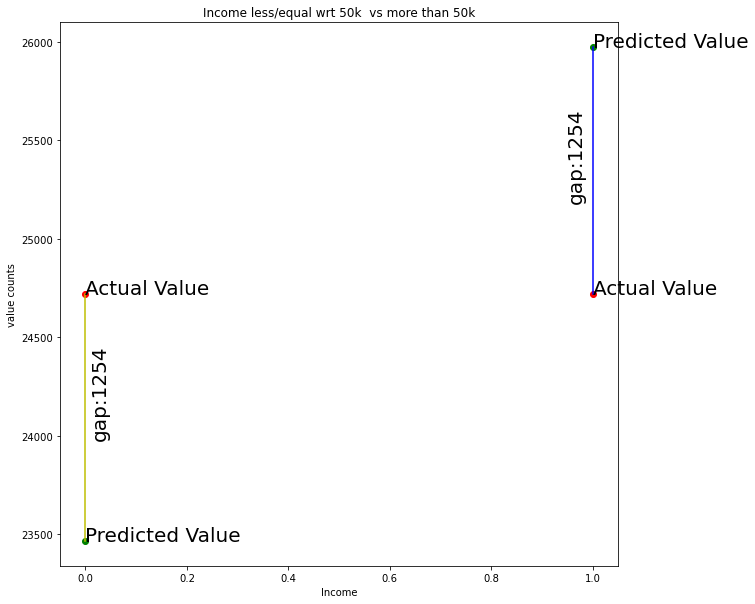

In [100]:
plt.figure(figsize=[10,10])
plt.scatter([0,1],[24719,24719],color='r')
plt.scatter([0,1],[23465,25973],color='g')
plt.plot([0,0],[23465,24719],color='y')
plt.plot([1,1],[25973,24719],color='b')
plt.text(0,24719,'Actual Value',fontsize=20)
plt.text(0,23465,'Predicted Value',fontsize=20)
plt.text(1,24719,'Actual Value',fontsize=20)
plt.text(1,25973,'Predicted Value',fontsize=20)
plt.text(0.01,24000,'gap:1254',fontsize=20,color='black',rotation='vertical')
plt.text(0.95,25200,'gap:1254',fontsize=20,color='black',rotation='vertical')
plt.xlabel("Income")
plt.ylabel('value counts')
plt.title('Income less/equal wrt 50k  vs more than 50k')

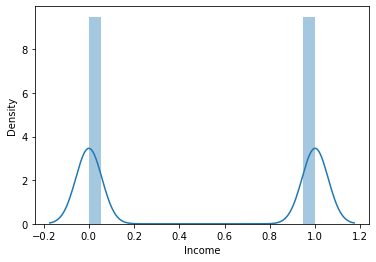

<AxesSubplot:xlabel='Income_pred', ylabel='Density'>

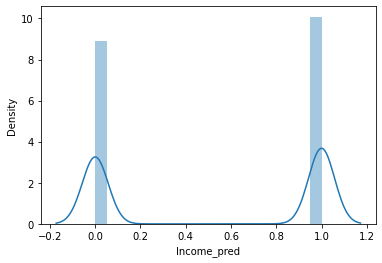

In [101]:
sn.distplot(newdf['Income'])
plt.show()
sn.distplot(newdf['Income_pred'])

<AxesSubplot:>

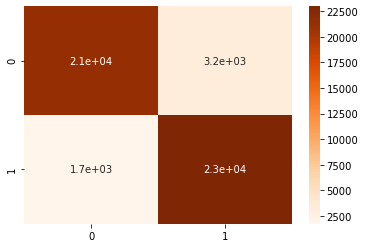

In [105]:
sn.heatmap(confusion_matrix(newdf['Income'],newdf['Income_pred']),annot=True,cmap="Oranges",xticklabels=model.classes_
               ,yticklabels=model.classes_)

In [103]:
confusion_matrix(newdf['Income'],newdf['Income_pred'])

array([[21471,  3248],
       [ 1742, 22977]], dtype=int64)

In [104]:
import joblib #Save model
joblib.dump(rfmodel, 'census.pkl')

['census.pkl']